# 이상치 파일

In [2]:
import pandas as pd

In [3]:
서울=pd.read_excel('서울 자치행정기관 이상치.xlsx',index_row=0)
서울=서울[['파일이름']]
서울

,파일이름
0,서울특별시 기상 정보
1,서울특별시 유동인구 현황
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)
...,...
254,2014년 노원구 병원 현황
255,비상대피시설
256,자동제세동기(AED) 설치현황
257,금융기관 현황


In [23]:
강원=pd.read_excel('강원 자치행정기관 이상치.xlsx',index_row=0)
강원=강원[['파일이름']]

In [24]:
경기=pd.read_excel('경기 자치행정기관 이상치.xlsx',index_row=0)
경기=경기[['파일이름']]

In [25]:
경남=pd.read_excel('경남 자치행정기관 이상치.xlsx',index_row=0)
경남=경남[['파일이름']]

In [26]:
경북=pd.read_excel('경북 자치행정기관 이상치.xlsx',index_row=0)
경북=경북[['파일이름']]

In [27]:
광주=pd.read_excel('광주 자치행정기관 이상치.xlsx',index_row=0)
광주=광주[['파일이름']]

In [28]:
대구=pd.read_excel('대구 자치행정기관 이상치.xlsx',index_row=0)
대구=대구[['파일이름']]

In [29]:
대전=pd.read_excel('대전 자치행정기관 이상치.xlsx',index_row=0)
대전=대전[['파일이름']]

In [30]:
부산=pd.read_excel('부산 자치행정기관 이상치.xlsx',index_row=0)
부산=부산[['파일이름']]

In [31]:
세종=pd.read_excel('세종 자치행정기관 이상치.xlsx',index_row=0)
세종=세종[['파일이름']]

In [32]:
인천=pd.read_excel('인천 자치행정기관 이상치.xlsx',index_row=0)
인천=인천[['파일이름']]

In [33]:
전남=pd.read_excel('전남 자치행정기관 이상치.xlsx',index_row=0)
전남=전남[['파일이름']]

In [34]:
전북=pd.read_excel('전북 자치행정기관 이상치.xlsx',index_row=0)
전북=전북[['파일이름']]

In [35]:
충남=pd.read_excel('충남 자치행정기관 이상치.xlsx',index_row=0)
충남=충남[['파일이름']]

In [36]:
충북=pd.read_excel('충북 자치행정기관 이상치.xlsx',index_row=0)
충북=충북[['파일이름']]

In [37]:
제주=pd.read_excel('제주 자치행정기관 이상치.xlsx',index_row=0)
제주=제주[['파일이름']]

In [38]:
울산=pd.read_excel('울산 자치행정기관 이상치.xlsx',index_row=0)
울산=울산[['파일이름']]

In [39]:
korea_wc=pd.concat([서울, 강원, 경기, 경남, 경북, 광주, 대구, 대전, 
                    부산, 세종, 울산, 인천, 전남, 전북, 제주, 충남, 충북],
                 )
korea_wc

,파일이름
0,서울특별시 기상 정보
1,서울특별시 유동인구 현황
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)
...,...
61,충청북도 단양군_사업장폐기물배출자 신고현황
62,충청북도 청주시_지정약수터정보
63,충청북도 진천군_사업장폐기물 신고현황
64,충청북도 괴산군_사업장폐기물배출자신고사업장현황


In [42]:
korea_wc.to_excel('korea_wc.xlsx')

# 이상치 워드클라우드

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import platform
from konlpy.tag import Okt
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [46]:
korea=pd.read_excel('korea_wc.xlsx',index_row=0)
korea.head(5)

,Unnamed: 0,파일이름
0,0,서울특별시 기상 정보
1,1,서울특별시 유동인구 현황
2,2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,3,서울특별시 숙박업소 정보(수시)
4,4,서울시 5대 범죄 발생현황 통계 (연간)


In [47]:
korea_file=list(korea['파일이름'])

In [106]:
stop_words = '''서울특별시 현황 경기도 인천광역시 부산광역시 대구광역시 
전라북도 충청북도 광주 동구 경상북도 경상남도 충청남도 광역시 전라남도 
강원도 양천구 제주 특별자치도 포천시 서울시 울산 별 서구 미추홀 서대문구 
대전광역시 전라북도 마포구 광진구 성동구 안산시 도봉구 중구 동작구 통영시 
계양구 군산시 남구 광진구 기장군 성주군 업 폐 대전광역시 강원도 구 김포시
 토 통영시 소 구 양주시 점 창원시 당진시 사하구 및 성남시 통계 동대문구 
 포항시 김포시 함 굉산구 목록 관련 부평구 계양구 데이터 군위군 정보 공주시
  양평군 밀양시 여수시 북구 가정우 남양군 담양군 중랑구 전주시 수시 강서구 
   공주시 양산시 착 광산구 광주시 연제구 연간 광양시 정읍시 자료 기준 
    동래구 지정 은평구 금정구 달서구 연수구 영도구 수영구 사상구 구미시 
     고양시 '''
stop_words = stop_words.split(' ')

In [169]:
def wordcloudf2(list):
    okt=Okt()
    morphs=[]

    for sentence in list:
        morphs.append(okt.pos(sentence))
        
    noun_list=[]

    for i in morphs:
        for word, tag in i:
            if word not in stop_words:
                if tag in['Noun']:
                    noun_list.append(word)
                
    count=Counter(noun_list)

    words=dict(count.most_common(100))
    
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color = 'white', 
                      width=800, height=600).generate_from_frequencies(words) 

    plt.figure(figsize=(15,10))
    plt.axis('off') 
    plt.imshow(wordcloud)
    return plt.show()

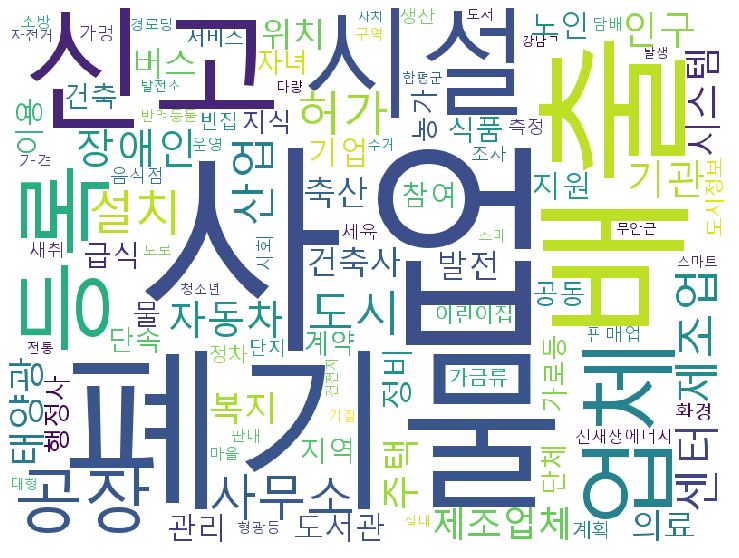

In [170]:
wordcloudf2(korea_file)

In [177]:
okt=Okt()
morphs=[]

for sentence in korea_file:
    morphs.append(okt.pos(sentence))

noun_list=[]

for i in morphs:
    for word, tag in i:
        if word not in stop_words:
            if tag in['Noun']:
                noun_list.append(word)

count=Counter(noun_list)

words1=dict(count.most_common(100))

words1

{'사업': 187,
 '폐기물': 161,
 '배출': 138,
 '신고': 112,
 '시설': 110,
 '업체': 75,
 '등록': 74,
 '공장': 53,
 '사무소': 38,
 '도시': 35,
 '설치': 35,
 '허가': 33,
 '센터': 33,
 '산업': 32,
 '제조업': 32,
 '장애인': 32,
 '기관': 30,
 '자동차': 29,
 '인구': 28,
 '주택': 27,
 '태양광': 27,
 '시스템': 27,
 '제조업체': 26,
 '복지': 24,
 '위치': 22,
 '의료': 22,
 '축산': 22,
 '버스': 22,
 '건축사': 21,
 '정비': 21,
 '발전': 21,
 '기업': 20,
 '도서관': 20,
 '관리': 19,
 '지원': 19,
 '이용': 19,
 '노인': 19,
 '물': 18,
 '급식': 18,
 '식품': 17,
 '지역': 17,
 '참여': 17,
 '건축': 16,
 '공동': 16,
 '단속': 16,
 '농가': 16,
 '가로등': 15,
 '행정사': 15,
 '단체': 15,
 '계약': 15,
 '자녀': 15,
 '지식': 14,
 '어린이집': 14,
 '정차': 14,
 '빈집': 14,
 '가금류': 14,
 '도시정보': 14,
 '계획': 13,
 '서비스': 13,
 '단지': 13,
 '환경': 13,
 '조사': 12,
 '음식점': 12,
 '가격': 12,
 '사회': 12,
 '측정': 12,
 '채취': 12,
 '가맹': 12,
 '판매업': 12,
 '체육': 12,
 '생산': 12,
 '신재생에너지': 12,
 '판매': 11,
 '담배': 11,
 '마을': 11,
 '운영': 11,
 '소방': 11,
 '형광등': 10,
 '도로': 10,
 '소매': 10,
 '반려동물': 10,
 '경로당': 10,
 '구역': 10,
 '자전거': 10,
 '수거': 9,
 '건전지': 9,
 '전통': 9,
 '청소년': 9,


In [191]:
words1_count=pd.DataFrame(list(words1.items()), columns=['단어','출현빈도'])
words1_count

,단어,출현빈도
0,사업,187
1,폐기물,161
2,배출,138
3,신고,112
4,시설,110
...,...,...
95,무안군,9
96,함평군,9
97,발생,8
98,자치,8


# 전체 파일

In [131]:
Seoul=pd.read_excel('서울 200806 통합.xlsx',index_row=0)
is_T=Seoul['제공기관유형']=='자치행정기관'
Seoul=Seoul[is_T]
Seoul=Seoul[['파일데이터명']]
Seoul.head(5)

,파일데이터명
0,서울특별시 대기오염전광판 위치정보 (수시)
1,서울시 북촌 CCTV 유동인구 일간/주간/월간 수집 정보 (수시)
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)


In [132]:
강원=pd.read_excel('강원도 200806 통합.xlsx',index_row=0)
is_T=강원['제공기관유형']=='자치행정기관'
강원=강원[is_T]
강원=강원[['파일데이터명']]

In [133]:
경기=pd.read_excel('경기도 200806 통합.xlsx',index_row=0)
is_T=경기['제공기관유형']=='자치행정기관'
경기=경기[is_T]
경기=경기[['파일데이터명']]

In [134]:
경남=pd.read_excel('경상남도 200806 통합.xlsx',index_row=0)
is_T=경남['제공기관유형']=='자치행정기관'
경남=경남[is_T]
경남=경남[['파일데이터명']]

In [135]:
경북=pd.read_excel('경상북도 200806 통합.xlsx',index_row=0)
is_T=경북['제공기관유형']=='자치행정기관'
경북=경북[is_T]
경북=경북[['파일데이터명']]

In [136]:
광주=pd.read_excel('광주 200806 통합.xlsx',index_row=0)
is_T=광주['제공기관유형']=='자치행정기관'
광주=광주[is_T]
광주=광주[['파일데이터명']]

In [137]:
대구=pd.read_excel('대구 200806 통합.xlsx',index_row=0)
is_T=대구['제공기관유형']=='자치행정기관'
대구=대구[is_T]
대구=대구[['파일데이터명']]

In [138]:
대전=pd.read_excel('대전 200806 통합.xlsx',index_row=0)
is_T=대전['제공기관유형']=='자치행정기관'
대전=대전[is_T]
대전=대전[['파일데이터명']]

In [139]:
부산=pd.read_excel('부산 200806 통합.xlsx',index_row=0)
is_T=부산['제공기관유형']=='자치행정기관'
부산=부산[is_T]
부산=부산[['파일데이터명']]

In [140]:
세종=pd.read_excel('세종 200806 통합.xlsx',index_row=0)
is_T=세종['제공기관유형']=='자치행정기관'
세종=세종[is_T]
세종=세종[['파일데이터명']]

In [141]:
인천=pd.read_excel('인천 200806 통합.xlsx',index_row=0)
is_T=인천['제공기관유형']=='자치행정기관'
인천=인천[is_T]
인천=인천[['파일데이터명']]

In [142]:
전남=pd.read_excel('전라남도 200806 통합.xlsx',index_row=0)
is_T=전남['제공기관유형']=='자치행정기관'
전남=전남[is_T]
전남=전남[['파일데이터명']]

In [143]:
전북=pd.read_excel('전라북도 200806 통합.xlsx',index_row=0)
is_T=전북['제공기관유형']=='자치행정기관'
전북=전북[is_T]
전북=전북[['파일데이터명']]

In [144]:
충남=pd.read_excel('충청남도 200806 통합.xlsx',index_row=0)
is_T=충남['제공기관유형']=='자치행정기관'
충남=충남[is_T]
충남=충남[['파일데이터명']]

In [145]:
충북=pd.read_excel('충청북도 200806 통합.xlsx',index_row=0)
is_T=충북['제공기관유형']=='자치행정기관'
충북=충북[is_T]
충북=충북[['파일데이터명']]

In [146]:
제주=pd.read_excel('제주 200806 통합.xlsx',index_row=0)
is_T=제주['제공기관유형']=='자치행정기관'
제주=제주[is_T]
제주=제주[['파일데이터명']]

In [147]:
울산=pd.read_excel('울산 200806 통합.xlsx',index_row=0)
is_T=울산['제공기관유형']=='자치행정기관'
울산=울산[is_T]
울산=울산[['파일데이터명']]

In [148]:
#자치행정기관 필터링 없는 파일
new_file2=pd.concat([Seoul, 강원, 경기, 경남, 경북, 광주, 대구, 대전, 
                    부산, 세종, 울산, 인천, 전남, 전북, 제주, 충남, 충북],
                 )
new_file2

,파일데이터명
0,서울특별시 대기오염전광판 위치정보 (수시)
1,서울시 북촌 CCTV 유동인구 일간/주간/월간 수집 정보 (수시)
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)
...,...
598,충청북도 청주시_자동차등록현황_20200724
599,충청북도_우리 쌀 맛있는 한그릇_20181008
600,충청북도 괴산군_사업장폐기물배출자신고사업장현황_20200722
601,충청북도 음성군_통계연보_20200716


In [149]:
new_file2.to_excel('new_file2.xlsx')

## 자치행정기관 필터링 없는것

In [126]:
#자치행정기관 필터링 없는 파일
new_file=pd.concat([Seoul, 강원, 경기, 경남, 경북, 광주, 대구, 대전, 
                    부산, 세종, 울산, 인천, 전남, 전북, 제주, 충남, 충북],
                 )
new_file

,파일데이터명
0,서울특별시 대기오염전광판 위치정보 (수시)
1,서울시 북촌 CCTV 유동인구 일간/주간/월간 수집 정보 (수시)
2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,서울특별시 숙박업소 정보(수시)
4,서울시 5대 범죄 발생현황 통계 (연간)
...,...
601,충청북도 음성군_통계연보_20200716
602,충청북도 농업미생물 활용 정보_2014
603,한국도로공사_대전충청권 톨게이트 진출입 일교통량_20200531
604,한국도로공사_대전충청권출발 지역간 년누계교통량 _20181231


In [127]:
new_file.to_excel('new_file.xlsx')

# 전체 워드클라우드

In [150]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import platform
from konlpy.tag import Okt
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [151]:
entire=pd.read_excel('new_file2.xlsx',index_row=0)
entire.head(5)

,Unnamed: 0,파일데이터명
0,0,서울특별시 대기오염전광판 위치정보 (수시)
1,1,서울시 북촌 CCTV 유동인구 일간/주간/월간 수집 정보 (수시)
2,2,서울시 공중화장실 위치정보 (좌표계: ITRF2000) (수시)
3,3,서울특별시 숙박업소 정보(수시)
4,4,서울시 5대 범죄 발생현황 통계 (연간)


In [153]:
entire_file=list(entire['파일데이터명'])

In [160]:
stop_words = '''서울특별시 현황 경기도 인천광역시 부산광역시 대구광역시 
전라북도 충청북도 광주 동구 경상북도 경상남도 충청남도 광역시 전라남도 
강원도 양천구 제주 특별자치도 포천시 서울시 울산 별 서구 미추홀 서대문구 
대전광역시 전라북도 마포구 광진구 성동구 안산시 도봉구 중구 동작구 통영시 
계양구 군산시 남구 광진구 기장군 성주군 업 폐 대전광역시 강원도 구 김포시
 토 통영시 소 구 양주시 점 창원시 당진시 사하구 및 성남시 통계 동대문구 
 포항시 김포시 함 굉산구 목록 관련 부평구 계양구 데이터 군위군 정보 공주시
  양평군 밀양시 여수시 북구 가정우 남양군 담양군 중랑구 전주시 수시 강서구 
   공주시 양산시 착 광산구 광주시 연제구 연간 광양시 정읍시 자료 기준 
    동래구 지정 은평구 금정구 달서구 연수구 영도구 수영구 사상구 구미시 
     고양시 '''
stop_words = stop_words.split(' ')

In [161]:
def wordcloudf2(list):
    okt=Okt()
    morphs=[]

    for sentence in list:
        morphs.append(okt.pos(sentence))
        
    noun_list=[]

    for i in morphs:
        for word, tag in i:
            if word not in stop_words:
                if tag in['Noun']:
                    noun_list.append(word)
                
    count=Counter(noun_list)

    words=dict(count.most_common(100))
    
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color = 'white', 
                      width=800, height=600).generate_from_frequencies(words) 

    plt.figure(figsize=(15,10))
    plt.axis('off') 
    plt.imshow(wordcloud)
    return plt.show()

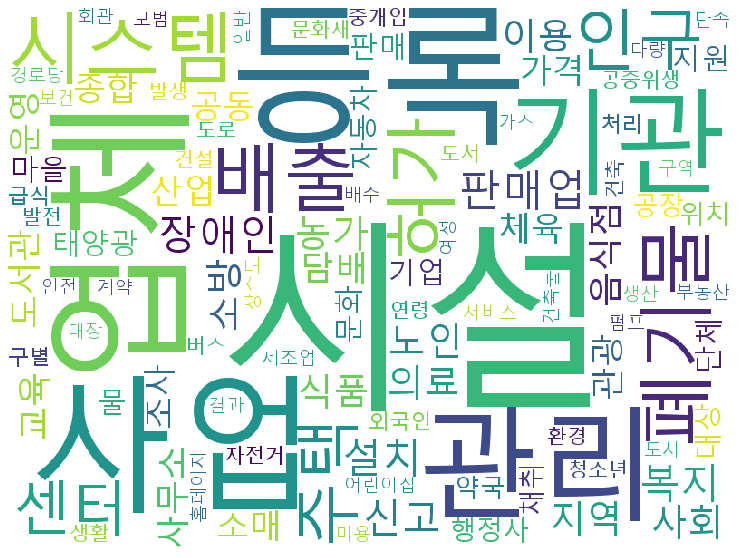

In [162]:
wordcloudf2(entire_file)

In [176]:
okt=Okt()
morphs=[]

for sentence in entire_file:
    morphs.append(okt.pos(sentence))

noun_list=[]

for i in morphs:
    for word, tag in i:
        if word not in stop_words:
            if tag in['Noun']:
                noun_list.append(word)

count=Counter(noun_list)

words=dict(count.most_common(100))

words

{'시설': 1121,
 '등록': 553,
 '업체': 545,
 '사업': 525,
 '관리': 383,
 '기관': 332,
 '시스템': 327,
 '폐기물': 319,
 '배출': 308,
 '허가': 295,
 '인구': 282,
 '주택': 273,
 '센터': 261,
 '판매업': 248,
 '복지': 231,
 '장애인': 225,
 '설치': 220,
 '신고': 211,
 '노인': 201,
 '소방': 193,
 '농가': 191,
 '지역': 186,
 '사회': 186,
 '의료': 184,
 '이용': 181,
 '식품': 179,
 '음식점': 171,
 '담배': 161,
 '교육': 159,
 '사무소': 156,
 '도서관': 151,
 '관광': 148,
 '체육': 144,
 '공동': 142,
 '소매': 141,
 '종합': 141,
 '가격': 140,
 '산업': 139,
 '운영': 138,
 '조사': 137,
 '태양광': 136,
 '판매': 136,
 '기업': 135,
 '물': 133,
 '지원': 130,
 '마을': 129,
 '자동차': 127,
 '단체': 126,
 '대상': 126,
 '문화': 125,
 '행정사': 124,
 '공장': 123,
 '채취': 121,
 '위치': 114,
 '약국': 112,
 '외국인': 110,
 '급식': 110,
 '처리': 108,
 '구별': 106,
 '공중위생': 105,
 '자전거': 103,
 '생활': 102,
 '버스': 102,
 '발생': 100,
 '건축': 98,
 '도로': 97,
 '도서': 97,
 '환경': 97,
 '청소년': 94,
 '연령': 91,
 '문화재': 90,
 '중개업': 88,
 '건설': 88,
 '발전': 88,
 '어린이집': 87,
 '제조업': 87,
 '경로당': 86,
 '구역': 85,
 '부동산': 85,
 '펌프': 85,
 '생산': 85,
 '여성': 84,
 '건축물': 83,


In [193]:
words_count=pd.DataFrame(list(words.items()), columns=['단어','출현빈도'])
words_count

,단어,출현빈도
0,시설,1121
1,등록,553
2,업체,545
3,사업,525
4,관리,383
...,...,...
95,안전,75
96,회관,75
97,보건,75
98,대장,74


In [205]:
dropped1=set(words1_count['단어'])-set(words_count['단어'])
pd.DataFrame(dropped1)

,0
0,전통
1,계획
2,기질
3,제조업체
4,참여
5,스마트
6,신재생에너지
7,지식
8,자치
9,가금류


In [206]:
dropped2=set(words_count['단어'])-set(words1_count['단어'])
pd.DataFrame(dropped2)

,0
0,공중위생
1,건설
2,미용
3,관광
4,배수
5,구별
6,홈페이지
7,종합
8,연령
9,처리


In [209]:
69/131

0.5267175572519084

In [10]:
def file_name(name):
    name=pd.read_excel('{} 200806 통합.xlsx'.format(name))
    is_T=name['제공기관유형']=='자치행정기관'
    name=name[is_T]
    name=name[['키워드']]
    return name

In [3]:
name='서울'
'{} 200806 통합.xlsx'.format(name)

'서울 200806 통합.xlsx'

In [9]:
file_name('서울')

,키워드
0,"기온, 대기환경, 미세먼지"
1,"사업체조사, 속성조사, 관찰조사"
2,"화장실, 개방화장실, 지하철화장실"
3,"모텔, 호텔, 민박"
4,"112, 피의자, 지구대"


In [ ]:
Seoul=pd.read_excel('서울 200806 통합.xlsx',index_row=0)
is_T=Seoul['제공기관유형']=='자치행정기관'
Seoul=Seoul[is_T]
Seoul=Seoul[['파일데이터명']]
Seoul.head(5)

- 분류체계별 워드클라우드
- 한 지역에서 폐기물 관련 정보가 많이 나왔다..?
- 키워드/파일명으로 돌려보기
- 지역별 활용도가 낮은 지역 뽑아서 향휴 데이터 제공 방향으로 제안->Q) 이미 제공하는 데이터 내에서만 활용도를 측정한것? 분류체계로 워드클라우드...??
- 높은 지역 활용도도 증명 확인해야하나?

In [ ]:
#제주 울산
#서울만